In [4]:
"Write a python program to show Back Propagation Network for XOR function with Binary Input and Output"

"""
Algorithm:
1. start  
2. Initialize Weights and Biases:
    2.1 Initialize the weights W1 and W2 randomly.
    2.2 Initialize the biases b1 and b2 randomly.

3.Forward Propagation:
    3.1. Compute the input to the hidden layer: layer1 = sigmoid(np.dot(X, W1) + b1).
    3.2. Compute the output of the network: layer2 = sigmoid(np.dot(layer1, W2) + b2).

4.Backpropagation:
    4.1. Compute the error between the actual output y and the predicted output layer2: error = y - layer2.
    4.2. Compute the delta for the output layer: delta2 = error * sigmoid_derivative(layer2).
    4.3. Compute the delta for the hidden layer: delta1 = np.dot(delta2, W2.T) * sigmoid_derivative(layer1).

5.Update Weights and Biases:
    5.1 Update the weights and biases using the learning rate learning_rate:
        W2 += learning_rate * np.dot(layer1.T, delta2)
        b2 += learning_rate * np.sum(delta2, axis=0, keepdims=True)
        W1 += learning_rate * np.dot(X.T, delta1)
        b1 += learning_rate * np.sum(delta1, axis=0, keepdims=True)

6.Repeat:
    6.1 Repeat steps 2-4 for a specified number of epochs (num_epochs).

7.Evaluate:
    7.1. Compute the predictions based on the final output layer2: predictions = (layer2 > 0.5).astype(int).
    7.2. Calculate the accuracy of the trained network: accuracy = np.mean(predictions == y).

8.Visualize:
    8.1. Plot the decision boundary of the trained network using Matplotlib.
"""


'\nAlgorithm:\n1. start  \n2. Initialize Weights and Biases:\n    2.1 Initialize the weights W1 and W2 randomly.\n    2.2 Initialize the biases b1 and b2 randomly.\n\n3.Forward Propagation:\n    3.1. Compute the input to the hidden layer: layer1 = sigmoid(np.dot(X, W1) + b1).\n    3.2. Compute the output of the network: layer2 = sigmoid(np.dot(layer1, W2) + b2).\n\n4.Backpropagation:\n    4.1. Compute the error between the actual output y and the predicted output layer2: error = y - layer2.\n    4.2. Compute the delta for the output layer: delta2 = error * sigmoid_derivative(layer2).\n    4.3. Compute the delta for the hidden layer: delta1 = np.dot(delta2, W2.T) * sigmoid_derivative(layer1).\n\n5.Update Weights and Biases:\n    5.1 Update the weights and biases using the learning rate learning_rate:\n        W2 += learning_rate * np.dot(layer1.T, delta2)\n        b2 += learning_rate * np.sum(delta2, axis=0, keepdims=True)\n        W1 += learning_rate * np.dot(X.T, delta1)\n        b1 +

Accuracy: 100.00%


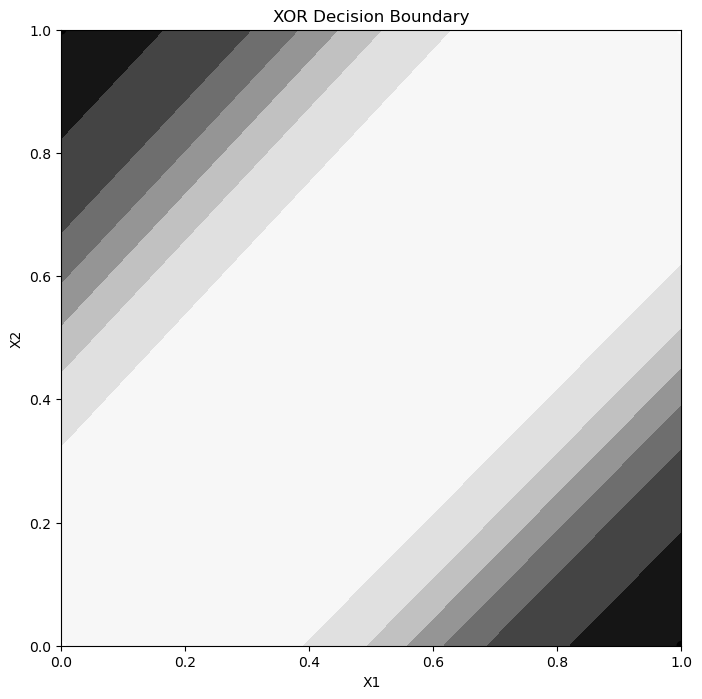

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
# Define the input and output data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Define the network architecture
input_size = 2
hidden_size = 2
output_size = 1

# Initialize the weights randomly
W1 = np.random.randn(input_size, hidden_size)
b1 = np.random.randn(1, hidden_size)
W2 = np.random.randn(hidden_size, output_size)
b2 = np.random.randn(1, output_size)

# Define the activation function (sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the activation function
def sigmoid_derivative(x):
    return x * (1 - x)

# Implement the backpropagation algorithm
learning_rate = 0.1
num_epochs = 10000

for epoch in range(num_epochs):
    # Forward propagation
    layer1 = sigmoid(np.dot(X, W1) + b1)
    layer2 = sigmoid(np.dot(layer1, W2) + b2)

    # Backpropagation
    error = y - layer2
    delta2 = error * sigmoid_derivative(layer2)
    delta1 = np.dot(delta2, W2.T) * sigmoid_derivative(layer1)

    # Update the weights and biases
    W2 += learning_rate * np.dot(layer1.T, delta2)
    b2 += learning_rate * np.sum(delta2, axis=0, keepdims=True)
    W1 += learning_rate * np.dot(X.T, delta1)
    b1 += learning_rate * np.sum(delta1, axis=0, keepdims=True)

# Test the trained network
predictions = (layer2 > 0.5).astype(int)
accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1)
Z = sigmoid(np.dot(Z, W2) + b2)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.Greys)
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.Greys)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('XOR Decision Boundary')
plt.show()